In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import lib.imageutl as imutl
import lib.visualizationutl as view
import lib.dataaug as aug

%matplotlib inline

In [4]:
pathdataset = '../db'
namedataset = 'car'
metadata = 'metadata.csv'
pathname = os.path.join(pathdataset, namedataset);
pathmetadata = os.path.join(pathdataset, namedataset, metadata)

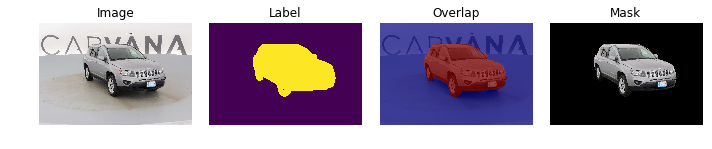

(1280, 1918, 3)


In [5]:
data = imutl.dataProvide( pathname, fn_image='train', fn_label='train_masks', lext='gif')
view.display_image_and_gt( data )
print(data.getimage(0).shape)


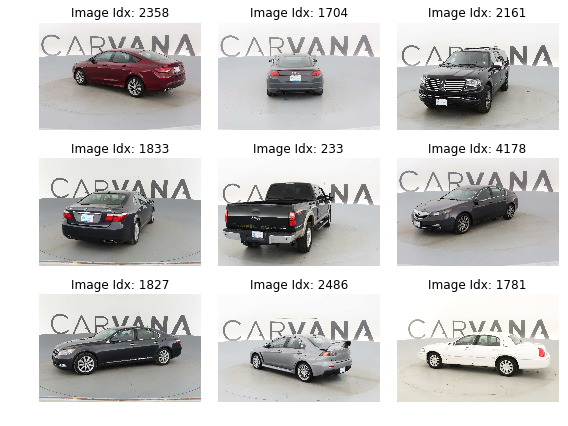

Total image: 5088


In [9]:
view.display_random_images(data)
print('Total image: {}'.format(data.num))

In [7]:
mdata = pd.read_csv(pathmetadata)
mdata.head()

,id,year,make,model,trim1,trim2
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg


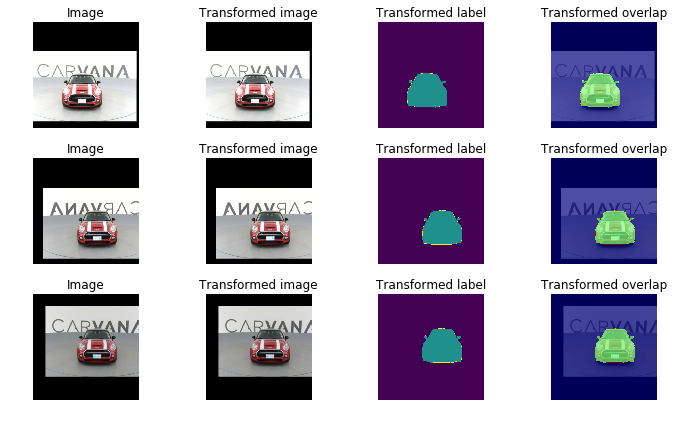

In [4]:
aug.display_random_images_aug(data)

In [7]:

#https://www.kaggle.com/hackerpoet/even-faster-run-length-encoder

import PIL.Image as Image

# Fast run length encoding
def rle (img):
    
    flat_img = img.flatten()
    flat_img = np.where(flat_img > 0.5, 1, 0).astype(np.uint8)

    starts = np.array((flat_img[:-1] == 0) & (flat_img[1:] == 1))
    ends = np.array((flat_img[:-1] == 1) & (flat_img[1:] == 0))
    starts_ix = np.where(starts)[0] + 2
    ends_ix = np.where(ends)[0] + 2
    lengths = ends_ix - starts_ix
    
    return starts_ix, lengths

mask = data.getlabel();
mask_rle = rle(mask)
print(mask_rle)

(array([ 453564,  455481,  457399,  459317,  461234,  463152,  465070,
        466988,  468906,  470824,  472742,  474656,  476542,  478452,
        480361,  482255,  484149,  486030,  487934,  489839,  491741,
        493652,  495566,  497481,  499397,  501313,  503229,  505146,
        507063,  508979,  510896,  512813,  514730,  516647,  518564,
        520481,  522398,  524315,  526232,  528149,  530066,  531984,
        533901,  535818,  537735,  539652,  541570,  543487,  545404,
        547321,  549239,  551156,  553073,  554991,  556908,  558825,
        560743,  562660,  564577,  566495,  568412,  570329,  572247,
        574164,  576081,  577999,  579916,  581834,  583751,  585668,
        587586,  589503,  591421,  593338,  595255,  597173,  599090,
        601008,  602925,  604843,  606760,  608678,  610595,  612512,
        614430,  616347,  618265,  620182,  622100,  624017,  625935,
        627852,  629769,  631687,  633604,  635522,  637439,  639357,
        641274,  64

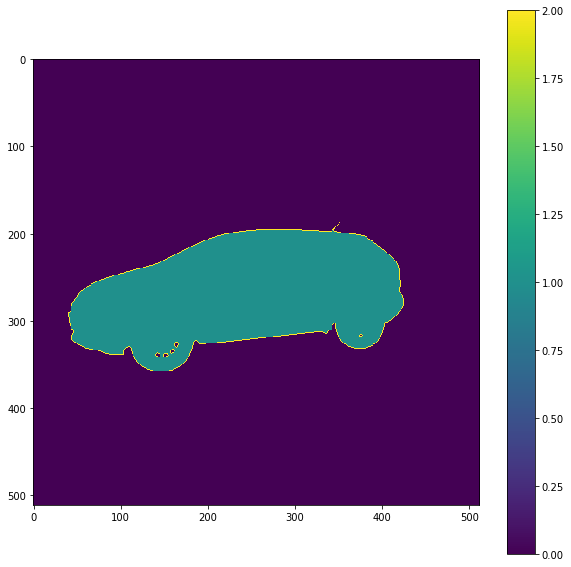

(512, 512, 3)
[0 1 2]


In [4]:
import scipy.misc

image = data.getimage(499);
label = np.array(data.getlabel());


(H,W) = image.shape[0:2];
asp = float(H)/W

w = 512
h = int(w*asp);

image_x = scipy.misc.imresize(image, (h,w), interp='bilinear')
label_x = scipy.misc.imresize(label, (h,w), interp='bilinear')

image_y = np.zeros((w,w,3));
label_y = np.zeros((w,w));

ini = (w-h)//2;
image_y[ini:h+ini,:,:] = image_x;
label_y[ini:h+ini,:] = label_x;

image_y = image_y.astype(np.uint8)
label_y = label_y.astype(np.uint8)

ret,label_y = cv2.threshold(label_y,127,255,0);
_,contours,_ = cv2.findContours(label_y, cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE )
for cnt in contours: cv2.drawContours(label_y, cnt, -1, 2, 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

#ax[0].imshow(image_y.astype(np.uint8))
cax = ax.imshow(label_y)
fig.colorbar(cax)
plt.show()

print(image_y.shape)
print(np.unique(label_y))

In [5]:

path = '../db';
namedataset = 'car';
namedataset_out = 'car_aug';
num_new_images = 10;

root = os.path.join(path,namedataset);
root_out = os.path.join(path,namedataset_out);

print(root)
print(root_out)

if os.path.exists(root_out) is not True:
    os.makedirs(root_out);
    os.makedirs(os.path.join(root_out,'images'));
    os.makedirs(os.path.join(root_out,'labels'));

# This actually creates the augmented dataset
#aug.data_aug(root, root_out, num_new_images)
aug.data_export(root, root_out, 1024)


../db/car
../db/car_aug
10 new images generated
20 new images generated
30 new images generated


KeyboardInterrupt: 

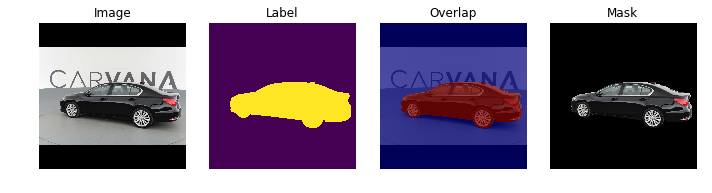

(1024, 1024, 3)
[  0 255]


In [4]:
path = '../db';
namedataset_out = 'car_aug';
root_out = os.path.join(path,namedataset_out);
data = imutl.dataProvide( root_out, ext='png', fn_image='images', fn_label='labels',posfix='', lext='png')
view.display_image_and_gt( data )

print(data.getimage(0).shape)
print(np.unique(data.getlabel()))


#view.display_random_images(data)
#print('Total image: {}'.format(data.num))

[  0   3 255]


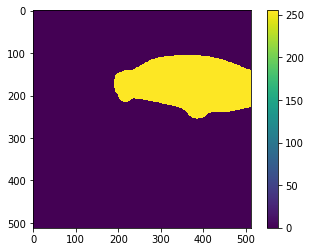

In [5]:
image = data.getimage(0);
label = data.getlabel();

print(np.unique(label))
plt.imshow(label)
plt.colorbar()
plt.show()


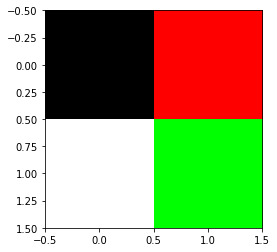

In [40]:
from matplotlib import cm
from PIL import Image

def getpalette():
    return (255.*np.array([*map(lambda x: cm.jet(x)[0:3],np.linspace(0., 1., 256))]).ravel()).astype('int');

#print((255.*np.array(cm.jet(1)[0:3]).ravel()).astype('int'))
#print( 255.*np.array([*map(lambda x: x*x, np.linspace(0.,1.,256))] )) 
#print(getpalette().shape)

#data = (np.random.rand(100,100)*255).astype('uint8');
data = np.array([[0,1],[255,2]]).astype('uint8')
im = Image.fromarray( data,  mode="P" )

#print(getpalette())
#mypalette = np.ones((769,))*255;

mypalette = [255 for x in range(769) ]
mypalette[0:3] = [0,0,0]
mypalette[3:6] = [255,0,0]
mypalette[6:8] = [0,255,0]

#print(mypalette)

#mypalette[0:3] = 0 
#im.putpalette([0,0,0,100,0,0,255,255,255])
im.putpalette(mypalette)

#im.show()
plt.imshow(im)

